In [204]:
import numpy as np
import matplotlib.pyplot as plt

Datos

In [205]:

V = np.array([2.0, 2.4, 2.8, 3.2, 3.6, 4.0, 4.4, 4.8]) #Voltaje en kV

#Las medidas de los radios se tomaron en cm

R_1 = np.array([2.120, 1.860, 1.750, 1.600, 1.400, 1.315, 1.290, 1.240])
incer_d_1 = np.array([0.270, 0.275, 0.280, 0.250, 0.170, 0.245, 0.235, 0.185])
R_2 = np.array([3.330, 3.155, 2.835, 2.675, 2.360, 2.225, 2.140, 2.040])
incer_d_2 = np.array([0.360, 0.280, 0.290, 0.280, 0.222, 0.205, 0.165, 0.170])

Longitud de onda de de Broglie

In [206]:

V_v = V * 1000 #Voltaje en V
h = 6.62607015e-34 #Joules*segundos
m_e = 9.10938356e-31 #kg
e = 1.602176634e-19 #Coulombs10

def longitud_de_onda (V_v):
    l_broglie = (h / (np.sqrt(2 * m_e * e * V_v)))
    return l_broglie

def incer_lambda_broglie (V_v):
    incer_V = 0.1
    return h / (2*np.sqrt(2 * m_e * e * V_v**3)) * incer_V

#longitud_de_onda(V_v)
#incer_lambda_broglie(V_v)

Longitud de onda de Bragg

In [207]:

d_1 = R_1 *2 #distancia en cm
d_2 = R_2 *2 #distancia en cm

#Distancias interplanares:

D1 = 213 #pm
D2 = 123 #pm

D1_m = D1 * 1e-12 #distancia en m
D2_m = D2 * 1e-12 #distancia en m

d_1_m = d_1 * 1e-2 #distancia en m
d_2_m = d_2 * 1e-2 #distancia en m

def longitud_de_onda_bragg_(d_m, D_m):
    return 2 * D_m * np.sin(0.5 * np.arctan(d_m/ (2 * 0.135)))

def incer_lambda_bragg (d_m, D_m):
    incer_d = 0.01
    return ((2 * D_m * np.cos(0.5 * np.arctan(d_m / (2 * 0.135))) * 1/(2*(1+(1/2*0.135)**2*d_m**2 * 2*0.135))) * incer_d)

#longitud_de_onda_bragg_(0.0629, D2_m)
#incer_lambda_bragg(d_2_m, D2_m)

Gráfica sin pesos, con las variables en Y separadas en dos ejes

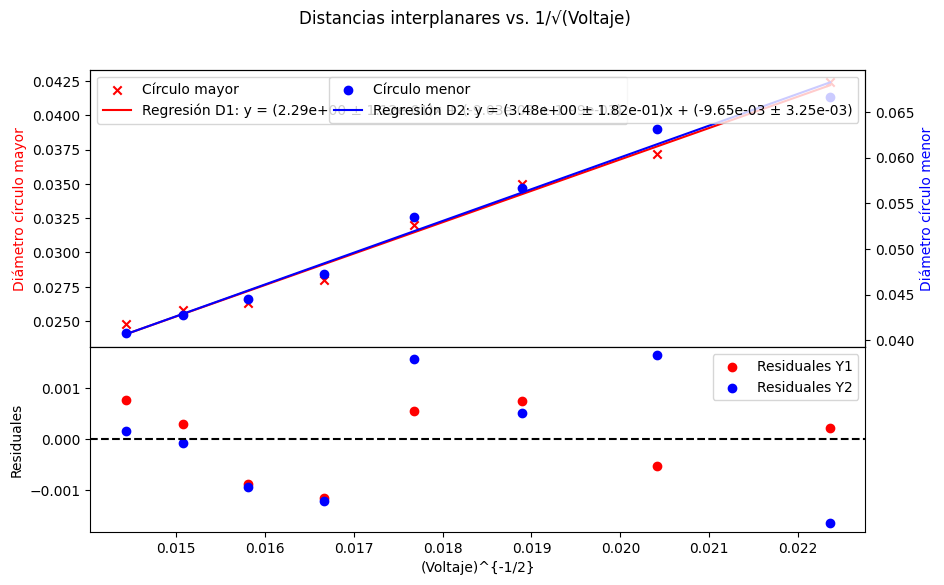

Y1: y = (2.29 ± 0.11)x + (-0.01 ± 0.0)
Y2: y = (3.48 ± 0.18)x + (-0.01 ± 0.0)


In [208]:
# Gráficas

Raiz_v = 1 / np.sqrt(V_v)

x = Raiz_v
y1 = d_1_m
y2 = d_2_m

# Ajuste de regresión lineal para el primer conjunto de datos
n = 1  # Grado del polinomio (1 para línea recta)
fit1, cov1 = np.polyfit(x, y1, n, cov=True)
m1, b1 = fit1  # Pendiente y corte con el eje Y
error_m1 = np.sqrt(cov1[0, 0])  # Desviación estándar de la pendiente
error_b1 = np.sqrt(cov1[1, 1])  # Desviación estándar del corte

# Ajuste de regresión lineal para el segundo conjunto de datos
fit2, cov2 = np.polyfit(x, y2, n, cov=True)
m2, b2 = fit2  # Pendiente y corte con el eje Y
error_m2 = np.sqrt(cov2[0, 0])  # Desviación estándar de la pendiente
error_b2 = np.sqrt(cov2[1, 1])  # Desviación estándar del corte

# Funciones de ajuste
fit_function1 = lambda x: m1 * x + b1
fit_function2 = lambda x: m2 * x + b2

# Generar puntos para la curva de ajuste
_x = np.linspace(np.min(x), np.max(x), 100)
_y1 = fit_function1(_x)
_y2 = fit_function2(_x)

# Cálculo de residuales
R1 = y1 - fit_function1(x)
R2 = y2 - fit_function2(x)

# Configuración de la figura
fig, axs = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [1.5, 1]}, sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle('Distancias interplanares vs. 1/√(Voltaje)')

# Gráfica superior con los dos conjuntos de datos
ax1 = axs[0]  # Eje principal
ax2 = ax1.twinx()  # Segundo eje Y

ax1.scatter(x, y1, label='Círculo mayor', color='red', marker='x')
ax1.plot(_x, _y1, label=f'Regresión D1: y = ({m1:.2e} ± {error_m1:.2e})x + ({b1:.2e} ± {error_b1:.2e})', color='red')

ax2.scatter(x, y2, label='Círculo menor', color='blue', marker='o')
ax2.plot(_x, _y2, label=f'Regresión D2: y = ({m2:.2e} ± {error_m2:.2e})x + ({b2:.2e} ± {error_b2:.2e})', color='blue')

ax1.set_ylabel('Diámetro círculo mayor', color='red')
ax2.set_ylabel('Diámetro círculo menor', color='blue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Gráfica inferior con residuales
axs[1].scatter(x, R1, color='red', label='Residuales Y1')
axs[1].scatter(x, R2, color='blue', label='Residuales Y2')
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('(Voltaje)^{-1/2}')
axs[1].set_ylabel('Residuales')
axs[1].legend()

plt.show()

# Imprimir ecuaciones
m1, b1, error_m1, error_b1 = np.round([m1, b1, error_m1, error_b1], 2)
m2, b2, error_m2, error_b2 = np.round([m2, b2, error_m2, error_b2], 2)

print(f'Y1: y = ({m1} ± {error_m1})x + ({b1} ± {error_b1})')
print(f'Y2: y = ({m2} ± {error_m2})x + ({b2} ± {error_b2})')


Gráfica sin pesos, con las variables en Y en el mismo eje

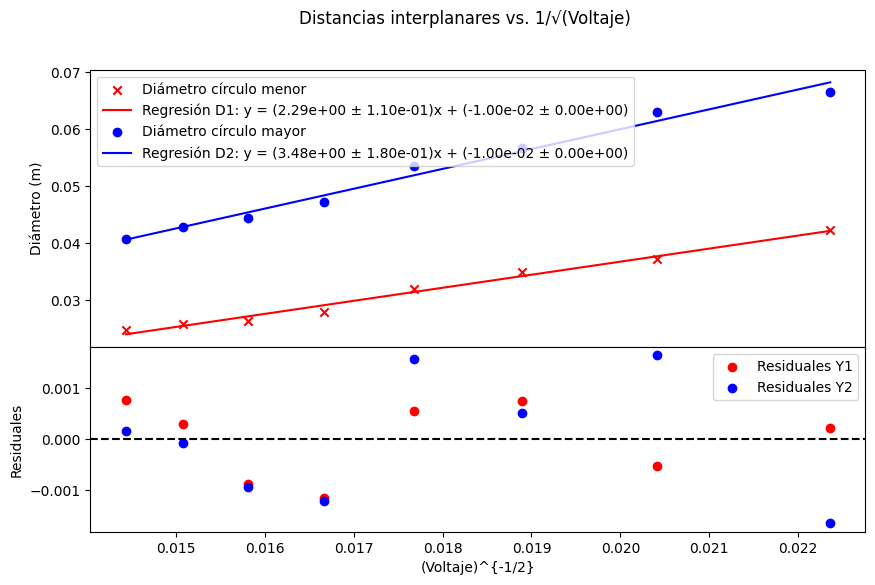

Y1: y = (2.29 ± 0.11)x + (-0.01 ± 0.0)
Y2: y = (3.48 ± 0.18)x + (-0.01 ± 0.0)


In [209]:
# Configuración de la figura
fig, axs = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [1.5, 1]}, sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle('Distancias interplanares vs. 1/√(Voltaje)')

# Gráfica superior con los dos conjuntos de datos en el mismo eje Y
axs[0].scatter(x, y1, label='Diámetro círculo menor', color='red', marker='x')
axs[0].plot(_x, _y1, label=f'Regresión D1: y = ({m1:.2e} ± {error_m1:.2e})x + ({b1:.2e} ± {error_b1:.2e})', color='red')

axs[0].scatter(x, y2, label='Diámetro círculo mayor', color='blue', marker='o')
axs[0].plot(_x, _y2, label=f'Regresión D2: y = ({m2:.2e} ± {error_m2:.2e})x + ({b2:.2e} ± {error_b2:.2e})', color='blue')

axs[0].set_ylabel('Diámetro (m)')
axs[0].legend()

# Gráfica inferior con residuales en el mismo eje Y
axs[1].scatter(x, R1, color='red', label='Residuales Y1')
axs[1].scatter(x, R2, color='blue', label='Residuales Y2')
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('(Voltaje)^{-1/2}')
axs[1].set_ylabel('Residuales')
axs[1].legend()

plt.show()

# Imprimir ecuaciones
m1, b1, error_m1, error_b1 = np.round([m1, b1, error_m1, error_b1], 2)
m2, b2, error_m2, error_b2 = np.round([m2, b2, error_m2, error_b2], 2)

print(f'Y1: y = ({m1} ± {error_m1})x + ({b1} ± {error_b1})')
print(f'Y2: y = ({m2} ± {error_m2})x + ({b2} ± {error_b2})')



Gráfica con pesos

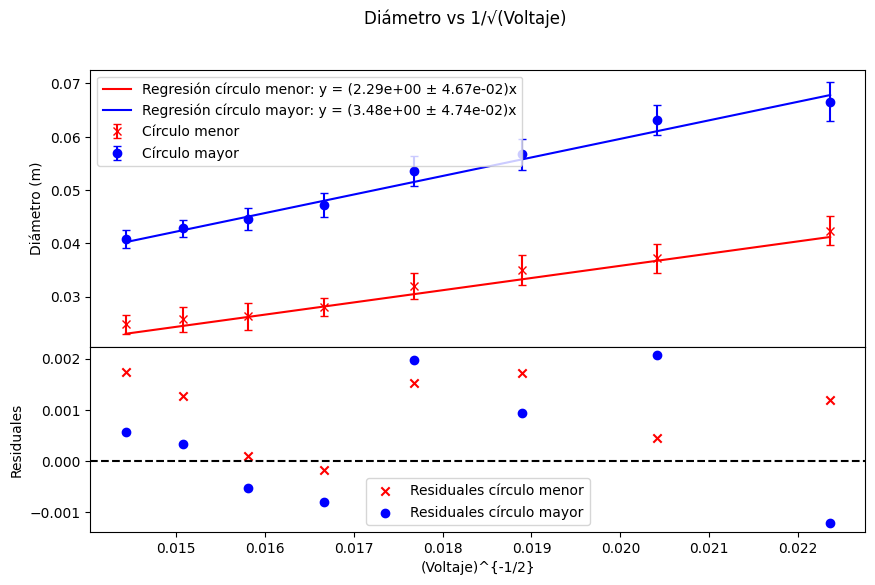

Y1: y = (2.29 ± 0.05)x
Y2: y = (3.48 ± 0.05)x


In [210]:
# Residuales
R1 = d_1_m - fit_function1(Raiz_v)
R2 = d_2_m - fit_function2(Raiz_v)

incer_d_1_m = incer_d_1 * 1e-2
incer_d_2_m = incer_d_2 * 1e-2

#Definir los pesos como 1 / (incertidumbre)^2
pesos_1 = 1 / (incer_d_1_m ** 2)
pesos_2 = 1 / (incer_d_2_m ** 2)


# Cálculo de la incertidumbre en la pendiente
error_m1 = np.sqrt(1 / np.sum(pesos_1 * Raiz_v**2))
error_m2 = np.sqrt(1 / np.sum(pesos_2 * Raiz_v**2))


# Puntos para la curva de ajuste
_x = np.linspace(np.min(Raiz_v), np.max(Raiz_v), 100)
_y1 = fit_function1(_x)
_y2 = fit_function2(_x)

# Gráfica
fig, axs = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [1.5, 1]}, sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle('Diámetro vs 1/√(Voltaje)')

# Gráfica superior con barras de error
axs[0].errorbar(Raiz_v, d_1_m, yerr=incer_d_1_m, fmt='rx', label='Círculo menor', capsize=3)
axs[0].plot(_x, _y1, 'r-', label=f'Regresión círculo menor: y = ({m1:.2e} ± {error_m1:.2e})x')

axs[0].errorbar(Raiz_v, d_2_m, yerr=incer_d_2_m, fmt='bo', label='Círculo mayor', capsize=3)
axs[0].plot(_x, _y2, 'b-', label=f'Regresión círculo mayor: y = ({m2:.2e} ± {error_m2:.2e})x')

axs[0].set_ylabel('Diámetro (m)')
axs[0].legend()

# Gráfica inferior SIN barras de error en residuales
axs[1].scatter(Raiz_v, R1, color='red', marker='x', label='Residuales círculo menor')
axs[1].scatter(Raiz_v, R2, color='blue', marker='o', label='Residuales círculo mayor')
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('(Voltaje)^{-1/2}')
axs[1].set_ylabel('Residuales')
axs[1].legend()

plt.show()

# Imprimir ecuaciones con errores
m1, error_m1 = np.round([m1, error_m1], 2)
m2, error_m2 = np.round([m2, error_m2], 2)

print(f'Y1: y = ({m1} ± {error_m1})x')
print(f'Y2: y = ({m2} ± {error_m2})x')

Análisis de la regresión

In [211]:
# Se conoce h

def distancia_interplanar (m):
    return (0.135*h) / (m*np.sqrt(2*m_e*e))

distancia_interplanar(3.48)

np.float64(4.757686974634083e-11)

In [212]:
# Se conocen d_i

def hallar_h (m,d):
    return (m*d*np.sqrt(2*m_e*e)) / (2*0.135)

def incer_hallar_h (m, d):
    incer_d = 0.01
    return np.sqrt((d*np.sqrt(2*m_e*e)/(2*0.135))**2 * incer_d**2)

a = hallar_h(2.29, 123.0e-12)
b = incer_hallar_h(2.29, 123.0e-12)

print(a, b)

5.636266487776576e-34 2.461251741387151e-36
